# Plots for Workshop

In [3]:
import pickle
import matplotlib.pyplot as plt

In [4]:
with open("results/OODness_dictionaries.pkl", "rb") as f:    
    d = pickle.load(f)
print(d)

accuracies_wo = d["accuracies_wo"]
accuracies_wo_std = d["accuracies_wo_std"]
accuracies_with = d["accuracies_with"]
accuracies_with_std = d["accuracies_with_std"]

num_samples_wo = d["num_answered_wo"]
num_samples_with = d["num_answered_with"]

{'accuracies_wo': {'noise_MNIST': [0.09453125, 0.09392277644230769, 0.09423076923076923, 0.09504206730769231], 'dead_leaves': [0.31634615384615383, 0.3797551081730769, 0.39154146634615383, 0.4848933293269231], 'FractalDB': [0.10878155048076923, 0.1289738581730769, 0.1446814903846154, 0.21214693509615384], 'stylegan': [0.34856520432692306, 0.3841421274038462, 0.3925706129807693, 0.4497295673076923], 'Shaders21k': [0.24464393028846154, 0.29192457932692306, 0.29556039663461536, 0.32078575721153846], 'FMNIST': [0.4197490985576923, 0.4296649639423077, 0.46552734375, 0.5060096153846153], 'MNIST': [0.9508939302884617, 0.9586989182692308, 0.9575871394230768, 0.957940204326923]}, 'accuracies_wo_std': {'noise_MNIST': [0.001996332360802055, 0.0011828985648692709, 0.0006636136666273377, 0.0005404478890806779], 'dead_leaves': [0.02800223035466494, 0.01873237036870846, 0.016256495598273808, 0.024615792399476602], 'FractalDB': [0.010520137056340242, 0.012368155844194477, 0.019834092361938505, 0.03629

In [5]:
print(accuracies_with["noise_MNIST"][2])

0.5858323317307692


In [6]:
for ds in accuracies_with.keys():
    print(ds + ": " + str(accuracies_with[ds][2]))
    


noise_MNIST: 0.5858323317307692
dead_leaves: 0.733173076923077
FractalDB: 0.7867037259615385
stylegan: 0.618487079326923
Shaders21k: 0.5948692908653845
FMNIST: 0.635419170673077
MNIST: 0.962372295673077


In [7]:
accuracies_wo_10 = {}
accuracies_with_10 = {}

for ds in accuracies_with.keys():
    accuracies_wo_10[ds] = accuracies_wo[ds][2]
    accuracies_with_10[ds] = accuracies_with[ds][2]


old=["noise_MNIST", "dead_leaves",  "stylegan", "Shaders21k", "FractalDB"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders", "Fractal"]

for i in range(len(old)):
    accuracies_with_10[new[i]] = accuracies_with_10.pop(old[i])
    accuracies_wo_10[new[i]] = accuracies_wo_10.pop(old[i])




accuracies_wo_10  = dict(sorted(accuracies_wo_10.items(), key=lambda item: item[1]))
accuracies_with_10= {key: accuracies_with_10[key] for key in accuracies_wo_10}





print(accuracies_wo_10)
print(accuracies_with_10)

{'Noise': 0.09423076923076923, 'Fractal': 0.1446814903846154, 'Shaders': 0.29556039663461536, 'Leaves': 0.39154146634615383, 'StyleGAN': 0.3925706129807693, 'FMNIST': 0.46552734375, 'MNIST': 0.9575871394230768}
{'Noise': 0.5858323317307692, 'Fractal': 0.7867037259615385, 'Shaders': 0.5948692908653845, 'Leaves': 0.733173076923077, 'StyleGAN': 0.618487079326923, 'FMNIST': 0.635419170673077, 'MNIST': 0.962372295673077}


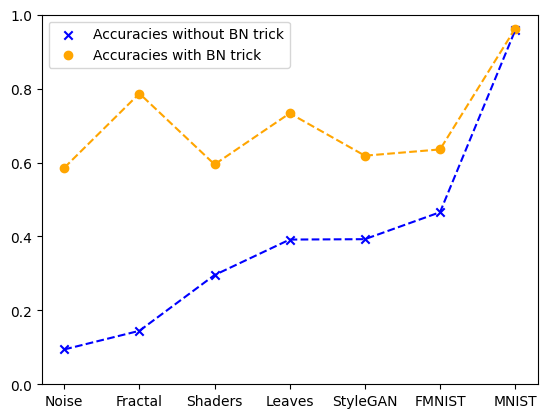

In [8]:
data = list(accuracies_wo_10.keys())
acc_wo = list(accuracies_wo_10.values())
acc_with = list(accuracies_with_10.values())



plt.figure()
plt.ylim(0, 1)

plt.scatter(data, acc_wo, color="blue", label="Accuracies without BN trick", marker="x")
plt.plot(data, acc_wo, color="blue", linestyle="dashed")    

plt.scatter(data, acc_with, color="orange", label="Accuracies with BN trick")
plt.plot(data, acc_with, color="orange", linestyle="dashed")

plt.legend()

plt.savefig("OODness_influence.png")

In [9]:
columns = [5, 8, 10, 20]

# Print the table header
header = f"{'Epsilon':<10}" + "".join([f"{col:<10}" for col in columns])
print(header)
print("-" * len(header))

for key in accuracies_wo.keys():
    row = f"{key:<10}" + "".join([f"{round(accuracies_wo[key][i], 4)}" for i in range(len(columns))])
    print(row)



Epsilon   5         8         10        20        
--------------------------------------------------
noise_MNIST0.09450.09390.09420.095
dead_leaves0.31630.37980.39150.4849
FractalDB 0.10880.1290.14470.2121
stylegan  0.34860.38410.39260.4497
Shaders21k0.24460.29190.29560.3208
FMNIST    0.41970.42970.46550.506
MNIST     0.95090.95870.95760.9579


In [10]:


# Define the keys (columns) and prepare the header row
keys = list(accuracies_wo.keys())  # Assuming all dicts have the same keys
header = header = f"{'Epsilon':<10}" + "".join([f"{col:<10}" for col in columns])
print(header)
print("-" * len(header))

# Iterate over each dictionary and print the values in the table
for row_name, row_dict in data.items():
    for key in keys:
        row_label = f"{key} + {row_name:<5}"
        row_values = "  ".join(f"{round(value, 4):<8}" for value in row_dict[key])
        print(f"{row_label}  {row_values}")

Epsilon   5         8         10        20        
--------------------------------------------------


AttributeError: 'list' object has no attribute 'items'

In [11]:
datasets = accuracies_wo.keys()
for dataset in datasets:
    for i in range(4):
        accuracies_with[dataset][i] = round(accuracies_with[dataset][i] * 100, 1)
        accuracies_wo[dataset][i] = round(accuracies_wo[dataset][i] * 100, 1)
        accuracies_with_std[dataset][i] = round(accuracies_with_std[dataset][i] * 100, 1)
        accuracies_wo_std[dataset][i] = round(accuracies_wo_std[dataset][i] * 100, 1)




In [12]:
epsilons = [5, 8, 10, 20]


# Start LaTeX table
latex_table = "\\begin{table}[]\n\\begin{tabular}{|c|c|c|c|c|}\n\\hline\n"
# Add header row with epsilon values
latex_table += "Dataset & " + " & ".join([f"$\\varepsilon = ${e}" for e in epsilons]) + " \\\\ \\hline\n"

# Populate each row from the dictionaries
for dataset in datasets:
    # Create rows for accuracies without and with additional context
    row_wo = " & ".join([f"{accuracies_wo[dataset][i]}\% $\\pm$ {accuracies_wo_std[dataset][i]}\%" for i in range(4)])
    row_with = " & ".join([f"{accuracies_with[dataset][i]}\% $\\pm$ {accuracies_with_std[dataset][i]}\%" for i in range(4)])
    
    
    row_with.replace("%", r"\%")
    
    # Add to LaTeX table
    latex_table += f"{dataset} + RS & {row_wo} \\\\ \\hline\n"
    latex_table += f"{dataset} + CS & {row_with} \\\\ \\hline\n"
    


# Close LaTeX table structure
latex_table += "\\end{tabular}\n\\end{table}"

latex_table.replace("%", r"\%")

# Print the resulting LaTeX table code
print(latex_table)

\begin{table}[]
\begin{tabular}{|c|c|c|c|c|}
\hline
Dataset & $\varepsilon = $5 & $\varepsilon = $8 & $\varepsilon = $10 & $\varepsilon = $20 \\ \hline
noise_MNIST + RS & 9.5\% $\pm$ 0.2\% & 9.4\% $\pm$ 0.1\% & 9.4\% $\pm$ 0.1\% & 9.5\% $\pm$ 0.1\% \\ \hline
noise_MNIST + CS & 37.1\% $\pm$ 2.3\% & 51.9\% $\pm$ 3.4\% & 58.6\% $\pm$ 1.6\% & 74.1\% $\pm$ 1.3\% \\ \hline
dead_leaves + RS & 31.6\% $\pm$ 2.8\% & 38.0\% $\pm$ 1.9\% & 39.2\% $\pm$ 1.6\% & 48.5\% $\pm$ 2.5\% \\ \hline
dead_leaves + CS & 57.1\% $\pm$ 1.8\% & 69.2\% $\pm$ 0.9\% & 73.3\% $\pm$ 0.6\% & 82.0\% $\pm$ 0.9\% \\ \hline
FractalDB + RS & 10.9\% $\pm$ 1.1\% & 12.9\% $\pm$ 1.2\% & 14.5\% $\pm$ 2.0\% & 21.2\% $\pm$ 3.6\% \\ \hline
FractalDB + CS & 59.7\% $\pm$ 2.7\% & 72.5\% $\pm$ 1.3\% & 78.7\% $\pm$ 1.5\% & 84.5\% $\pm$ 1.4\% \\ \hline
stylegan + RS & 34.9\% $\pm$ 1.4\% & 38.4\% $\pm$ 1.8\% & 39.3\% $\pm$ 2.0\% & 45.0\% $\pm$ 2.8\% \\ \hline
stylegan + CS & 50.8\% $\pm$ 1.9\% & 58.1\% $\pm$ 2.1\% & 61.8\% $\pm$ 1.2\% & 69.

<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_3744902/4043840838.py:12: SyntaxWarning: invalid escape sequence '\%'
  row_wo = " & ".join([f"{accuracies_wo[dataset][i]}\% $\\pm$ {accuracies_wo_std[dataset][i]}\%" for i in range(4)])
/tmp/ipykernel_3744902/4043840838.py:12: SyntaxWarning: invalid escape sequence '\%'
  row_wo = " & ".join([f"{accuracies_wo[dataset][i]}\% $\\pm$ {accuracies_wo_std[dataset][i]}\%" for i in range(4)])
/tmp/ipykernel_3744902/4043840838.py:13: SyntaxWarning: invalid escape sequence '\%'
  row_with = " & ".join([f"{accuracies_with[dataset][i]}\% $\\pm$ {accuracies_with_std[dataset][i]}\%" 

In [13]:
for dataset in datasets:
    for i in range(4):
        accuracies_with[dataset][i] = round(accuracies_with[dataset][i] * 100, 1)



In [14]:
print(accuracies_with)

{'noise_MNIST': [3710.0, 5190.0, 5860.0, 7410.0], 'dead_leaves': [5710.0, 6920.0, 7330.0, 8200.0], 'FractalDB': [5970.0, 7250.0, 7870.0, 8450.0], 'stylegan': [5080.0, 5810.0, 6180.0, 6940.0], 'Shaders21k': [4630.0, 5490.0, 5950.0, 6660.0], 'FMNIST': [5310.0, 5950.0, 6350.0, 7610.0], 'MNIST': [9580.0, 9660.0, 9620.0, 9610.0]}


In [15]:
epsilons = [5, 8, 10, 20]


# Start LaTeX table
latex_table = "\\begin{table}[]\n\\begin{tabular}{|c|c|c|c|c|}\n\\hline\n"
# Add header row with epsilon values
latex_table += "Dataset & " + " & ".join([f"$\\varepsilon = ${e}" for e in epsilons]) + " \\\\ \\hline\n"

# Populate each row from the dictionaries
for dataset in datasets:
    # Create rows for accuracies without and with additional context
    row_wo = " & ".join([f"{num_samples_wo[dataset][i]}" for i in range(4)])
    row_with = " & ".join([f"{num_samples_with[dataset][i]}" for i in range(4)])
    
    
    row_with.replace("%", r"\%")
    
    # Add to LaTeX table
    latex_table += f"{dataset} + RS & {row_wo} \\\\ \\hline\n"
    latex_table += f"{dataset} + CS & {row_with} \\\\ \\hline\n"
    


# Close LaTeX table structure
latex_table += "\\end{tabular}\n\\end{table}"

latex_table.replace("%", r"\%")

# Print the resulting LaTeX table code
print(latex_table)

\begin{table}[]
\begin{tabular}{|c|c|c|c|c|}
\hline
Dataset & $\varepsilon = $5 & $\varepsilon = $8 & $\varepsilon = $10 & $\varepsilon = $20 \\ \hline
noise_MNIST + RS & 2059.2 & 4514.2 & 6578.6 & 19713.8 \\ \hline
noise_MNIST + CS & 1222.2 & 2732.4 & 3942.4 & 11967.6 \\ \hline
dead_leaves + RS & 1389.4 & 3191.0 & 4663.8 & 13907.2 \\ \hline
dead_leaves + CS & 1674.0 & 3700.0 & 5416.6 & 16316.2 \\ \hline
FractalDB + RS & 2381.6 & 5291.4 & 7682.0 & 23036.8 \\ \hline
FractalDB + CS & 1548.6 & 3465.6 & 5023.4 & 15033.8 \\ \hline
stylegan + RS & 1839.6 & 4054.4 & 5889.0 & 17843.6 \\ \hline
stylegan + CS & 2017.6 & 4468.4 & 6521.0 & 19673.8 \\ \hline
Shaders21k + RS & 1986.8 & 4454.8 & 6350.2 & 19351.4 \\ \hline
Shaders21k + CS & 1983.6 & 4400.0 & 6393.6 & 19232.0 \\ \hline
FMNIST + RS & 724.8 & 1569.2 & 2316.4 & 6989.4 \\ \hline
FMNIST + CS & 849.0 & 1885.8 & 2745.4 & 8268.6 \\ \hline
MNIST + RS & 2882.2 & 4631.4 & 4681.8 & 4623.6 \\ \hline
MNIST + CS & 2927.6 & 4717.2 & 4679.2 & 4668.8 \\

In [16]:
svhn_data_wo = {}
svhn_data_with = {}

svhn_data_wo ["noise"] = [0.12065544608648056, 0.11293345762634555, 0.12027985883050539, 0.10921678297755884]
svhn_data_wo["dead leaves"] = [0.2066599388797665, 0.25091794380587484, 0.3072296626984127, 0.4317578623882503]
svhn_data_wo["StyleGAN"] = [0.260495062488597, 0.38905138204707174, 0.46742439792008755, 0.577475740056559]
svhn_data_wo ["Shaders21k"] = [0.4066747628170042, 0.5480324074074074, 0.6228070550538223, 0.7199223738825031]
svhn_data_wo["SVHN pub"] = [0.8373486247947454, 0.864189216155811, 0.8695073036398467, 0.871163593550447]

svhn_data_with["noise"] = [0.12916068007662834, 0.13291441456850941, 0.14133626391169496, 0.22023524448093415]
svhn_data_with["dead leaves"] =  [0.2509250706987776, 0.37482610381317283, 0.47163496624703516, 0.6146880986590039]
svhn_data_with["StyleGAN"] = [0.288265713373472, 0.47034357325305604, 0.5242407008301405, 0.6549336628808611]
svhn_data_with ["Shaders21k"] = [0.45579402139208175, 0.6252216463692757, 0.6635914123791279, 0.761801421957672]
svhn_data_with["SVHN pub"] = [0.8403939461320927, 0.868902943121693, 0.8721998437785077, 0.8764339308520341]

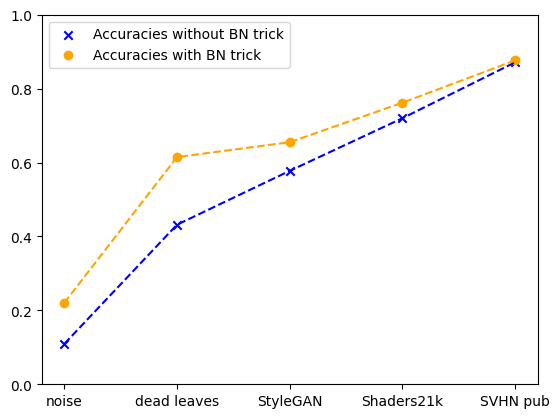

In [17]:
data = list(svhn_data_wo.keys())
acc_wo = [val[3] for val in svhn_data_wo.values()]
acc_with =  [val[3] for val in svhn_data_with.values()]



plt.figure()
plt.ylim(0, 1)

plt.scatter(data, acc_wo, color="blue", label="Accuracies without BN trick", marker="x")
plt.plot(data, acc_wo, color="blue", linestyle="dashed")    

plt.scatter(data, acc_with, color="orange", label="Accuracies with BN trick")
plt.plot(data, acc_with, color="orange", linestyle="dashed")

plt.legend()

plt.savefig("results/comparison_on_SVHN.png")
svhn_data_wo = {}
svhn_data_with = {}


In [18]:
fid_SVHN = {'SVHN': 0.1237,    'Shaders': 15.6990,'StyleGAN': 16.5535,'Leaves': 18.4737, 'noise':66.8186}
kid_SVHN = {'SVHN': 0.0091, 'Shaders': 0.2833, 'StyleGAN': 0.2470, 'Leaves': 0.3411,  'noise': 0.5601}

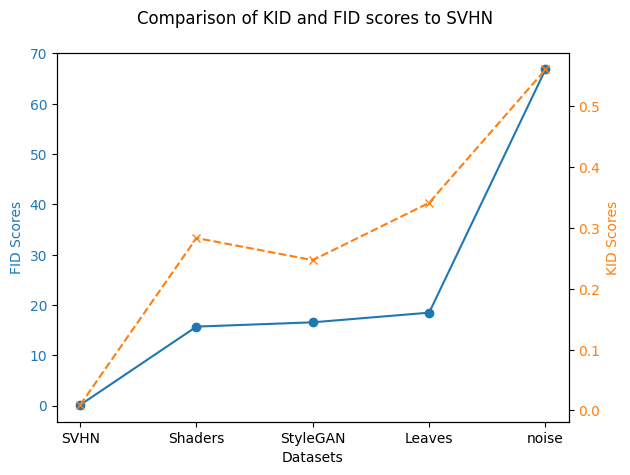

In [19]:
keys = list(fid_SVHN.keys()) 
fid_scores = list(fid_SVHN.values())
kid_scores = list(kid_SVHN.values())

fig, ax1 = plt.subplots()

ax1.set_xlabel('Datasets')
ax1.set_ylabel('FID Scores', color='tab:blue')
ax1.plot(keys, fid_scores, color='tab:blue', marker='o', label='Dict1')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # Create a twin y-axis
ax2.set_ylabel('KID Scores', color='tab:orange')
ax2.plot(keys, kid_scores, color='tab:orange', marker='x', linestyle='--', label='Dict2')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.suptitle("Comparison of KID and FID scores to SVHN")
fig.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [22]:
fmnist_data_wo = {}
fmnist_data_with = {}

fmnist_data_wo["noise"]= [0.09794921875, 0.10087890625, 0.10146484375, 0.106640625]
fmnist_data_wo["FractalDB"]= [0.16435546875, 0.22080078125, 0.2076171875, 0.2578125]
fmnist_data_wo["MNIST"] = [0.210546875, 0.23564453125, 0.25234375, 0.25107421875]
fmnist_data_wo["Leaves"]= [0.24580078125, 0.22529296875, 0.25439453125, 0.2701171875]
fmnist_data_wo["Shaders"] = [0.31103515625, 0.39638671875, 0.36005859375, 0.45107421875]
fmnist_data_wo["Style"] = [0.3484375, 0.38564453125, 0.39306640625, 0.43056640625]
fmnist_data_wo["FMNIST"]= [0.79482421875, 0.8076171875, 0.8201171875, 0.82099609375]

fmnist_data_with["noise"] = [0.29560546875, 0.4271484375, 0.4470703125, 0.6142578125]
fmnist_data_with["FractalDB"] = [0.3337890625, 0.3455078125, 0.46904296875, 0.58759765625]
fmnist_data_with["MNIST"] = [0.48623046875, 0.52802734375, 0.52646484375, 0.5955078125]
fmnist_data_with["Leaves"] = [0.4822265625, 0.60419921875, 0.64111328125, 0.72822265625]
fmnist_data_with["Shaders"] = [0.48994140625, 0.6068359375, 0.63642578125, 0.686328125]
fmnist_data_with["Style"] = [0.65517578125, 0.6408203125, 0.65244140625, 0.71064453125]
fmnist_data_with["FMNIST"] = [0.80400390625, 0.807421875, 0.82001953125, 0.82548828125]

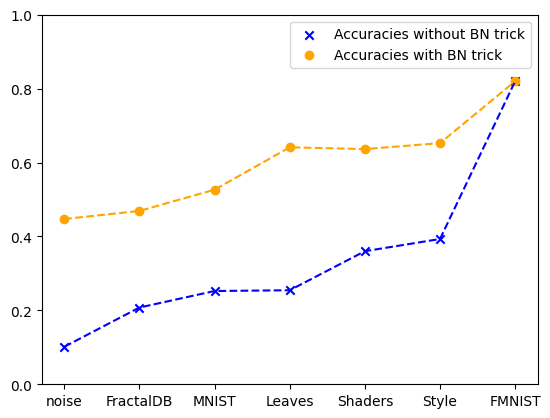

In [23]:
data = list(fmnist_data_wo.keys())
acc_wo = [val[2] for val in fmnist_data_wo.values()]
acc_with =  [val[2] for val in fmnist_data_with.values()]



plt.figure()
plt.ylim(0, 1)

plt.scatter(data, acc_wo, color="blue", label="Accuracies without BN trick", marker="x")
plt.plot(data, acc_wo, color="blue", linestyle="dashed")    

plt.scatter(data, acc_with, color="orange", label="Accuracies with BN trick")
plt.plot(data, acc_with, color="orange", linestyle="dashed")

plt.legend()

plt.savefig("results/comparison_on_FMNIST.png")
svhn_data_wo = {}
svhn_data_with = {}